<a href="https://colab.research.google.com/github/bcdmodelos/qualificacao-modelscode/blob/main/Modelo-Computacional/codigo_modelo_prophet_catole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Regressão pelo Prophet do Dados de COVID-19 para o bairro do Catolé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/Notebooks_Doutorado/base-campina/

!ls

/content/drive/MyDrive/Notebooks_Doutorado/base-campina
dataset_Amazonas_usableData.csv
dataset_Bodocongo_usable.csv
dataset_Brasil_usableData.csv
dataset_CampinaGrande_casos_acumulados_usable.csv
dataset_CampinaGrande_casos_diarios_usable.csv
dataset_CampinaGrande_usableData.csv
dataset_Catole_usable.csv
dataset_Malvinas_usable.csv
dataset_Paraiba_usableData.csv
dataset_Pernambuco_usableData.csv
dfBodocongoProphet.csv
dfBrasil.csv
dfBrasilProphet.csv
dfCampinaGrandeProphet.csv
dfCatoleProphet.csv
dfParaibaProphet.csv


In [5]:
file_path = "./dfCatoleProphet.csv"
dfCasosCatole = pd.read_csv(file_path, encoding='latin1')
dfCasosCatole.head()

,ds,y
0,2020-03-23,1
1,2020-04-14,2
2,2020-04-23,3
3,2020-04-24,4
4,2020-05-02,6


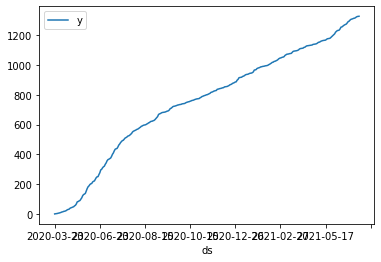

In [6]:
dfCasosCatole.set_index('ds').plot();

In [12]:
m = Prophet()
m = m.fit(dfCasosCatole)
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_1hqck4/84edijhr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa_1hqck4/nvaws037.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51784', 'data', 'file=/tmp/tmpa_1hqck4/84edijhr.json', 'init=/tmp/tmpa_1hqck4/nvaws037.json', 'output', 'file=/tmp/tmpa_1hqck4/prophet_modelhg0dpuxz/prophet_model-20221019224843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:48:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:48:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


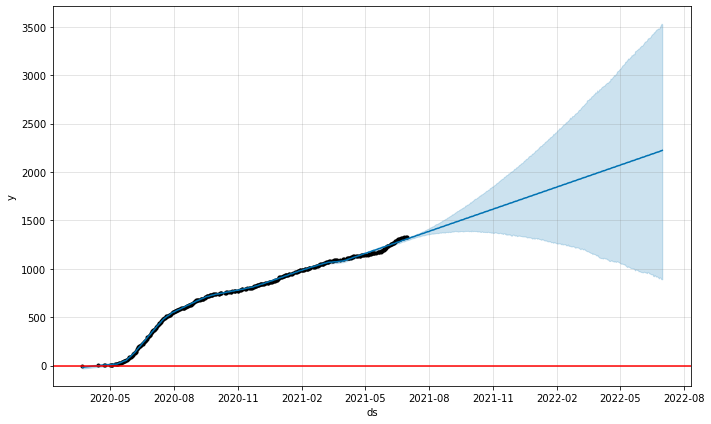

In [13]:
m.plot(forecast)
plt.axhline(y=0, color='red')

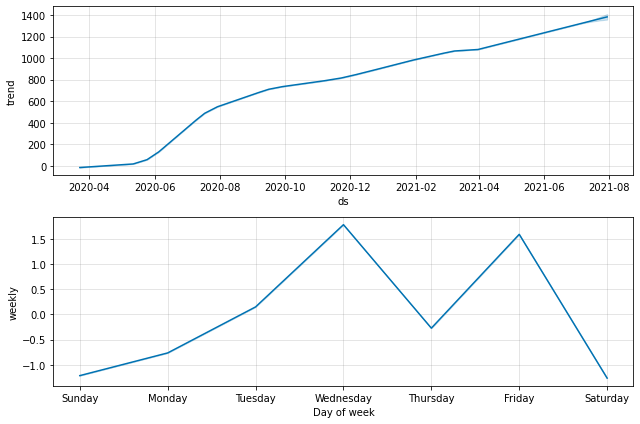

In [9]:
m.plot_components(forecast);